In [1]:
# install pycaret
# To install pycaret uncomment the last line of the cell and type CTRL+Enter, 
# then comment it again to avoid executing again
# To run this notebook , Goto Cell menu and choose Run All
#!pip3 install pycaret

In [2]:
import pandas as pd

In [3]:
data_classification = pd.read_csv('datasets/loan_train_data.csv')

In [4]:
#PLEASE NOTE: In the output cell below, you need to click the cell and type 'Enter' to continue exe

from pycaret import classification
classification_setup = classification.setup(data= data_classification, target='Personal Loan')

#PLEASE NOTE: In the output cell below, you need to click the cell and type 'Enter'
# to continue execution

Setup Succesfully Completed!


,Description,Value
0,session_id,4399
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(4000, 14)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [5]:
trainedModels=classification.compare_models(n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.9886,0.9969,0.8956,0.9845,0.9367,0.9305,0.9325,2.23
1,Gradient Boosting Classifier,0.9861,0.9962,0.8919,0.962,0.923,0.9154,0.9177,0.4439
2,Light Gradient Boosting Machine,0.9857,0.9965,0.8732,0.9758,0.9206,0.9128,0.9151,0.1073
3,Extreme Gradient Boosting,0.985,0.9953,0.8883,0.9554,0.9174,0.9092,0.9118,0.105
4,Extra Trees Classifier,0.9793,0.9894,0.7872,0.9955,0.8743,0.8634,0.8731,0.166
5,Decision Tree Classifier,0.9782,0.933,0.8771,0.895,0.8849,0.8728,0.8735,0.0074
6,Random Forest Classifier,0.9732,0.9847,0.758,0.9557,0.8412,0.8269,0.8359,0.1148
7,Ada Boost Classifier,0.9693,0.9809,0.7798,0.8917,0.8269,0.8102,0.8153,0.164
8,Linear Discriminant Analysis,0.9453,0.9623,0.6056,0.7769,0.6774,0.6482,0.656,0.0136
9,Ridge Classifier,0.9407,0,0.3976,0.9672,0.558,0.5327,0.596,0.0093


In [10]:
# catboost looks like one of the best models for this data . 
# Unfortunately catboost model does not support a lot of visualization features in pycaret
# To demonstrate the power of pycaret we are going to use the
# 2nd model(Gradient Boosting Classifier) at index 1 

goodModel = classification.tune_model(trainedModels[1])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9821,0.9963,0.8889,0.9231,0.9057,0.8958,0.896
1,0.9893,0.999,0.8889,1,0.9412,0.9353,0.9373
2,0.9786,0.9965,0.8148,0.9565,0.88,0.8683,0.8717
3,0.9857,0.9978,0.8519,1,0.92,0.9122,0.9157
4,0.975,0.9797,0.7407,1,0.8511,0.8377,0.849
5,0.9929,0.9985,0.9259,1,0.9615,0.9576,0.9585
6,0.9893,0.9943,0.8889,1,0.9412,0.9353,0.9373
7,0.9964,0.9993,0.963,1,0.9811,0.9792,0.9794
8,0.9929,0.999,0.9259,1,0.9615,0.9576,0.9585
9,0.9857,0.9983,0.8462,1,0.9167,0.9089,0.9127


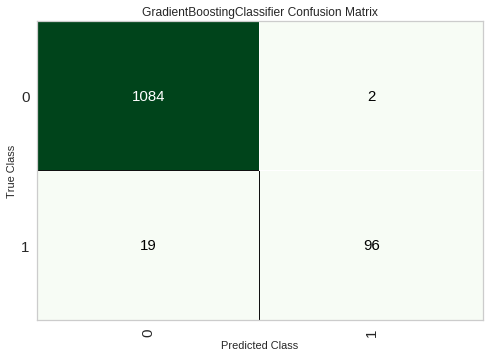

In [11]:
classification.plot_model(goodModel, plot = 'confusion_matrix')

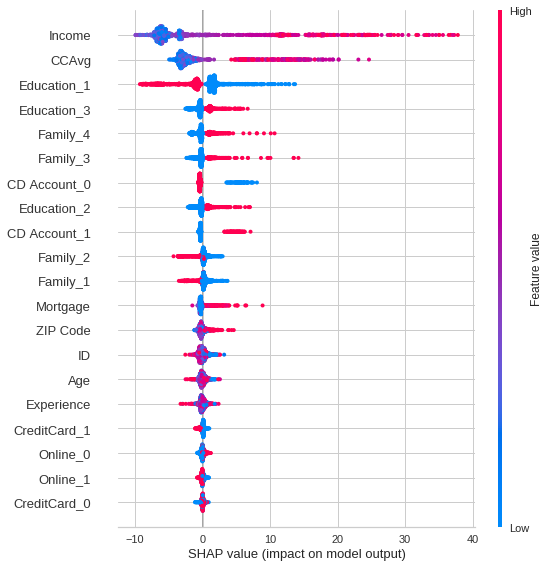

In [12]:
#
# SHAP value for each variable tells you whether the variable positively or negatively 
# impacts the final result. Higher the value on one direction , higher the impact 
# on that direction (positive or negative)
#

#Example: 
#    High income means high chance of getting loan 
    
classification.interpret_model(goodModel)

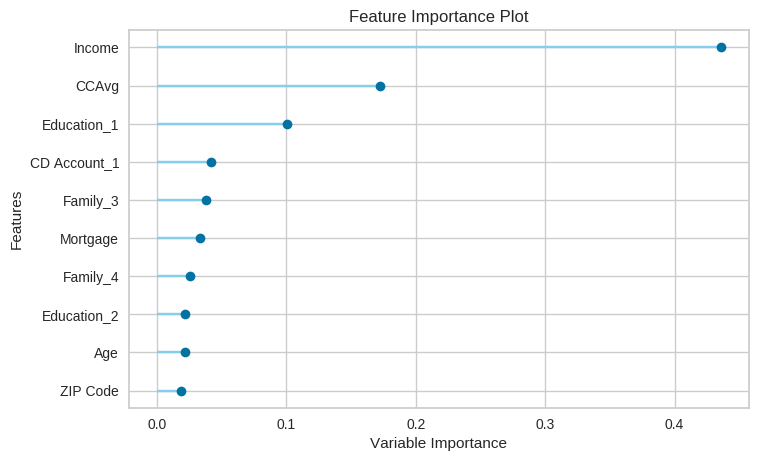

In [20]:
classification.plot_model(goodModel, plot = 'feature')

#Higher importance means that input feature/input variable controls the predicted output

In [21]:
test_data_classification = pd.read_csv('datasets/loan_test_data.csv')

In [22]:
predictions = classification.predict_model(goodModel, data=test_data_classification)

In [23]:
predictions

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Label,Score
0,118,58,33,61,92833,2,2.30,3,193,0,0,0,1,0,0,0.0000
1,1817,45,19,91,92373,2,1.70,2,0,0,1,0,1,0,0,0.0000
2,671,23,-1,61,92374,4,2.60,1,239,0,0,0,1,0,0,0.0000
3,2994,65,40,20,92647,3,0.10,3,0,0,0,0,0,1,0,0.0000
4,3265,67,41,114,95616,4,2.40,3,0,0,0,0,1,0,0,0.0000
5,2839,30,6,181,94542,3,4.10,2,0,1,0,1,1,1,1,1.0000
6,4232,56,32,60,93106,1,1.80,3,227,0,0,0,1,0,0,0.0000
7,4915,65,39,94,92374,1,2.00,1,0,0,0,0,0,1,0,0.0000
8,1995,32,8,183,94080,1,6.00,1,0,0,0,0,0,0,0,0.0000
9,237,43,18,89,93407,3,0.50,3,0,0,0,0,1,1,0,0.0000


In [24]:
classification.save_model(goodModel, 'catboost_model_1') 

# Model is saved to a pickle file with the name catboost_model_1 in the current directory

Transformation Pipeline and Model Succesfully Saved


In [25]:

#
#  Whenever you want to use this model, load it
#

goodmodel = classification.load_model(model_name='catboost_model_1')

Transformation Pipeline and Model Successfully Loaded


In [26]:
goodmodel

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='Personal Loan',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagoric...
                                            max_depth=60, max_features='sqrt',
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
 